In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from datetime import date, timedelta

from sklearn.model_selection import train_test_split

from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import Dense, LSTM

!pip install yfinance
import yfinance as yf

!pip install AutoTS
from autots import AutoTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
def stockPrice(val ,title) :

    today = date.today()

    d1       = today.strftime("%Y-%m-%d")
    end_date = d1

    d2         = date.today() - timedelta(days=5000) 
    d2         = d2.strftime("%Y-%m-%d")
    start_date = d2


    data = yf.download(
                          val                   , 
                          start    = start_date , 
                          end      = end_date   , 
                          progress = False
                      )

    data = data[["Close"]]
  
    close_data = data['Close'].values
    close_data = close_data.reshape((-1,1))

    split_percent = 0.80
    split = int(split_percent*len(close_data))

    close_train = close_data[:split]
    close_test = close_data[split:]

    date_train = data['Close'][:split]
    date_test  = data['Close'][split:]
  
    plt.figure(figsize=(20, 10))
    plt.plot(date_train, color = "black" , label = 'Train')
    plt.plot(date_test, color = "red"  , label = 'Test')
    plt.ylabel('Stock Price')
    plt.xlabel('Date')
    plt.title("Stock Price Data")
    plt.show()

    ## Model 1
    look_back = 15

    train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
    test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

    model = Sequential()
    
    model.add(LSTM(10,activation='relu',input_shape=(look_back,1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    num_epochs = 25
    model.fit_generator(train_generator, epochs=num_epochs, verbose=1)
   
    prediction = model.predict_generator(test_generator)

    close_train = close_train.reshape((-1))
    close_test = close_test.reshape((-1))
    prediction = prediction.reshape((-1))

    trace1 = go.Scatter(x = date_train ,y = close_train ,mode = 'lines' ,name = 'Data')
    trace2 = go.Scatter(x = date_test  ,y = prediction  ,mode = 'lines' ,name = 'Prediction')
    trace3 = go.Scatter(x = date_test  ,y = close_test  , mode='lines'  ,name = 'Ground Truth')
    layout = go.Layout(title = "Stock" ,xaxis = {'title' : "Date"} ,yaxis = {'title' : "Close"})

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    fig.show()
        


    ## Model 2
    model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple',max_generations=2,transformer_max_depth=2 ,verbose=2)
    model = model.fit(date_train)

    prediction = model.predict()

    y_pred = model.predict()
    forecast = y_pred.forecast

    print(forecast)

Available Stocks : 

1. Apple 

2. Bitcoin 

3. Netflix 

Enter name of stock or -1 to exit: 1


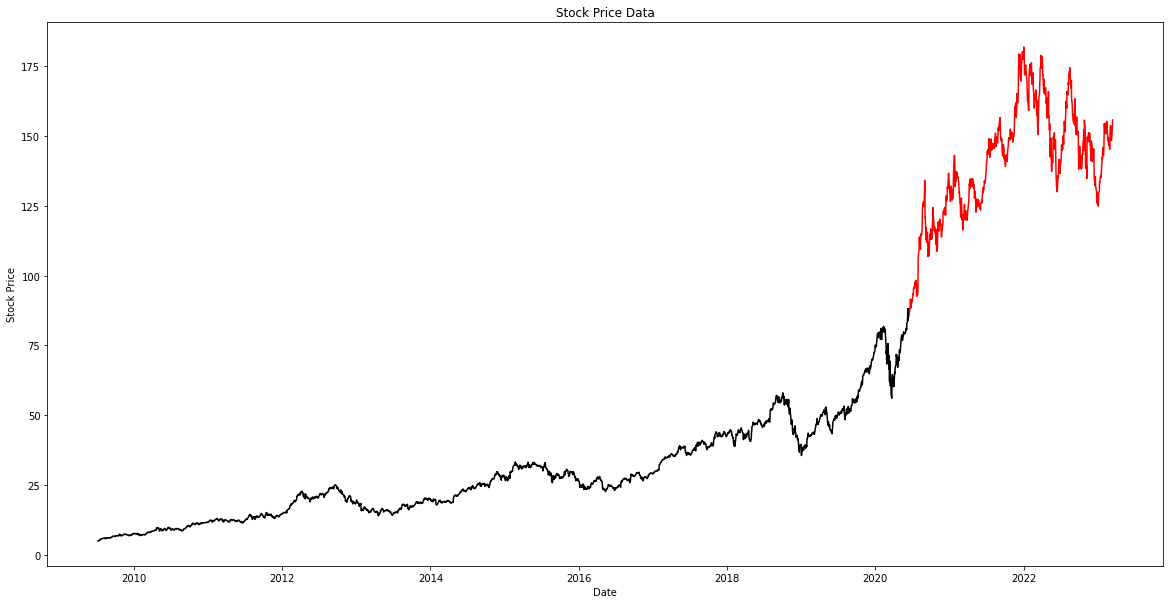

Epoch 1/25


<ipython-input-4-ea0185fccf84>:55: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



138/138 [==============================] - 6s 17ms/step - loss: 1516.0902
Epoch 2/25
138/138 [==============================] - 2s 15ms/step - loss: 35.4341
Epoch 3/25
138/138 [==============================] - 1s 9ms/step - loss: 4.9541
Epoch 4/25
138/138 [==============================] - 1s 8ms/step - loss: 4.5726
Epoch 5/25
138/138 [==============================] - 1s 8ms/step - loss: 4.1577
Epoch 6/25
138/138 [==============================] - 1s 8ms/step - loss: 3.8520
Epoch 7/25
138/138 [==============================] - 1s 7ms/step - loss: 4.0130
Epoch 8/25
138/138 [==============================] - 1s 7ms/step - loss: 4.2435
Epoch 9/25
138/138 [==============================] - 1s 9ms/step - loss: 3.3147
Epoch 10/25
138/138 [==============================] - 2s 11ms/step - loss: 3.0754
Epoch 11/25
138/138 [==============================] - 1s 7ms/step - loss: 3.7789
Epoch 12/25
138/138 [==============================] - 1s 8ms/step - loss: 2.2160
Epoch 13/25
138/138 [========

<ipython-input-4-ea0185fccf84>:57: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



Inferred frequency is: B
Model Number: 1 with model ARIMA in generation 0 of 2 with params {"p": 4, "d": 0, "q": 12, "regression_type": null} and transformations {"fillna": "cubic", "transformations": {"0": "bkfilter"}, "transformation_params": {"0": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 2 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 2 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}}}
Model Number: 4 with model AverageValueNaive in generation 0 of 2 with params {"method": "Mean"} and transformations {"fillna": "roll

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 2 with params {"regression_model": {"model": "KerasRNN", "model_params": {"kernel_initializer": "glorot_uniform", "epochs": 50, "batch_size": 32, "optimizer": "adam", "loss": "Huber", "hidden_layer_sizes": [32, 32, 32], "rnn_type": "GRU"}}, "datepart_method": "recurring", "regression_type": null} and transformations {"fillna": "mean", "transformations": {"0": "Round", "1": "QuantileTransformer"}, "transformation_params": {"0": {"model": "middle", "decimals": 1, "on_transform": true, "on_inverse": false}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}}}
Epoch 1/50
89/89 - 9s - loss: 0.0500 - 9s/epoch - 103ms/step
Epoch 2/50
89/89 - 1s - loss: 0.0435 - 506ms/epoch - 6ms/step
Epoch 3/50
89/89 - 1s - loss: 0.0433 - 502ms/epoch - 6ms/step
Epoch 4/50
89/89 - 1s - loss: 0.0429 - 503ms/epoch - 6ms/step
Epoch 5/50
89/89 - 1s - loss: 0.0424 - 514ms/epoch - 6ms/step
Epoch 6/50
89/89 - 1s - loss: 0.0424 - 543ms/epoch - 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 36 with model FBProphet in generation 0 of 2 with params {"holiday": true, "regression_type": null, "growth": "linear", "n_changepoints": 30, "changepoint_prior_scale": 0.05, "seasonality_mode": "additive", "changepoint_range": 0.98, "seasonality_prior_scale": 10.0, "holidays_prior_scale": 10.0} and transformations {"fillna": "quadratic", "transformations": {"0": "QuantileTransformer", "1": "Slice"}, "transformation_params": {"0": {"output_distribution": "normal", "n_quantiles": 1000}, "1": {"method": 0.5}}}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/_qm3ua4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/_004mwve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18811', 'data', 'file=/tmp/tmpav2iq6so/_qm3ua4c.json', 'init=/tmp/tmpav2iq6so/_004mwve.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_modeln2kbcmdm/prophet_model-20230317052603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 37 with model GluonTS in generation 0 of 2 with params {"gluon_model": "Transformer", "epochs": 80, "learning_rate": 0.01, "context_length": "1ForecastLength", "regression_type": null} and transformations {"fillna": "ffill", "transformations": {"0": "QuantileTransformer", "1": "MaxAbsScaler"}, "transformation_params": {"0": {"output_distribution": "normal", "n_quantiles": 20}, "1": {}}}
Template Eval Error: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1375, in TemplateWizard
    df_forecast = model_forecast(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1194, in model_forecast
    df_forecast = ModelPrediction(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 712, in ModelPrediction
    model = model.fit(df_train_transformed, future_regressor=future_regressor_train)
  File "/usr/local/lib/python3.9/dist-packages/autots/model

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 2

[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Para

Model Number: 39 with model MultivariateRegression in generation 0 of 2 with params {"regression_model": {"model": "LightGBM", "model_params": {"objective": "regression", "learning_rate": 0.1, "num_leaves": 70, "max_depth": -1, "boosting_type": "gbdt", "n_estimators": 100}}, "mean_rolling_periods": 12, "macd_periods": null, "std_rolling_periods": 30, "max_rolling_periods": null, "min_rolling_periods": 28, "quantile90_rolling_periods": 10, "quantile10_rolling_periods": null, "ewm_alpha": null, "ewm_var_alpha": null, "additional_lag_periods": null, "abs_energy": false, "rolling_autocorr_periods": null, "datepart_method": null, "polynomial_degree": null, "regression_type": "User", "window": 3, "holiday": false, "probabilistic": false} and transformations {"fillna": "ffill", "transformations": {"0": "QuantileTransformer", "1": "MaxAbsScaler"}, "transformation_params": {"0": {"output_distribution": "normal", "n_quantiles": 20}, "1": {}}}
Template Eval Error: Traceback (most recent call last

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/4edvhh8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/oa87jplt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74858', 'data', 'file=/tmp/tmpav2iq6so/4edvhh8a.json', 'init=/tmp/tmpav2iq6so/oa87jplt.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_model079v3dsd/prophet_model-20230317052613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 55 with model FBProphet in generation 0 of 2 with params {"holiday": true, "regression_type": null, "growth": "linear", "n_changepoints": 25, "changepoint_prior_scale": 30, "seasonality_mode": "multiplicative", "changepoint_range": 0.9, "seasonality_prior_scale": 10.0, "holidays_prior_scale": 10.0} and transformations {"fillna": "zero", "transformations": {"0": "Slice"}, "transformation_params": {"0": {"method": 0.5}}}


05:26:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 56 with model SeasonalNaive in generation 0 of 2 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 30} and transformations {"fillna": "fake_date", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler"}, "transformation_params": {"0": {"lag_1": 7, "method": "LastValue"}, "1": {}}}
Model Number: 57 with model DatepartRegression in generation 0 of 2 with params {"regression_model": {"model": "RandomForest", "model_params": {"n_estimators": 100, "min_samples_leaf": 2, "bootstrap": true}}, "datepart_method": "expanded", "polynomial_degree": null, "regression_type": null} and transformations {"fillna": "ffill", "transformations": {"0": "QuantileTransformer", "1": "Detrend"}, "transformation_params": {"0": {"output_distribution": "normal", "n_quantiles": 20}, "1": {"model": "Linear", "phi": 1, "window": null}}}
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building t

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52

[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 60 with model UnivariateRegression in generation 0 of 2 with params {"regression_model": {"model": "DecisionTree", "model_params": {"max_depth": null, "min_samples_split": 1.0}}, "holiday": false, "mean_rolling_periods": null, "macd_periods": null, "std_rolling_periods": null, "max_rolling_periods": 12, "min_rolling_periods": 58, "ewm_var_alpha": null, "ewm_alpha": 0.5, "additional_lag_periods": 363, "abs_energy": false, "rolling_autocorr_periods": null, "add_date_part": "simple_2_poly", "polynomial_degree": null, "x_transform": null, "regression_type": null, "window": null} and transformations {"fillna": "rolling_mean", "transformations": {"0": "MaxAbsScaler", "1": "SeasonalDifference"}, "transformation_params": {"0": {}, "1": {"lag_1": 7, "method": "LastValue"}}}
Model Number: 61 with model ARCH in generation 0 of 2 with params {"mean": "Zero", "lags": 1, "vol": "GARCH", "p": 4, "o": 1, "q": 2, "power": 1.5, "dist": "studentst", "rescale": true, "simulations": 1000, "ma

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.88833e-26): result may not be accurate.



Model Number: 64 with model AverageValueNaive in generation 0 of 2 with params {"method": "Exp_Weighted_Mean", "window": null} and transformations {"fillna": "fake_date", "transformations": {"0": "AlignLastValue", "1": "MinMaxScaler"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 0.5, "first_value_only": false}, "1": {}}}
Model Number: 65 with model GLS in generation 0 of 2 with params {} and transformations {"fillna": "zero", "transformations": {"0": "QuantileTransformer", "1": "MaxAbsScaler"}, "transformation_params": {"0": {"output_distribution": "uniform", "n_quantiles": 1000}, "1": {}}}
Model Number: 66 with model SeasonalNaive in generation 0 of 2 with params {"method": "lastvalue", "lag_1": 7, "lag_2": 60} and transformations {"fillna": "ffill", "transformations": {"0": "ClipOutliers", "1": "Detrend"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": null, "t

/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py:492: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 69 with model FBProphet in generation 0 of 2 with params {"holiday": false, "regression_type": null, "changepoint_prior_scale": 30, "seasonality_prior_scale": 25, "holidays_prior_scale": 10.0, "seasonality_mode": "multiplicative", "changepoint_range": 0.8, "growth": "linear", "n_changepoints": 25} and transformations {"fillna": "fake_date", "transformations": {"0": "MinMaxScaler"}, "transformation_params": {"0": {}}}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/c2t901d_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/fkuu53jr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46402', 'data', 'file=/tmp/tmpav2iq6so/c2t901d_.json', 'init=/tmp/tmpav2iq6so/fkuu53jr.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_modelwing7oce/prophet_model-20230317052620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 70 with model GluonTS in generation 0 of 2 with params {"gluon_model": "Rotbaum", "epochs": 20, "learning_rate": 0.001, "context_length": 5, "regression_type": "User"} and transformations {"fillna": "nearest", "transformations": {"0": "ClipOutliers"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}}}
Template Eval Error: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1375, in TemplateWizard
    df_forecast = model_forecast(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1194, in model_forecast
    df_forecast = ModelPrediction(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 712, in ModelPrediction
    model = model.fit(df_train_transformed, future_regressor=future_regressor_train)
  File "/usr/local/lib/python3.9/dist-packages/autots/models/gluonts.py", line 95, in fit
    raise ImportErr

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.88833e-26): result may not be accurate.



Model Number: 84 with model ARDL in generation 0 of 2 with params {"lags": 1, "trend": "t", "order": 3, "causal": false, "regression_type": "User"} and transformations {"fillna": "ffill", "transformations": {"0": "STLFilter", "1": "DifferencedTransformer"}, "transformation_params": {"0": {"decomp_type": "STL", "part": "trend", "seasonal": 7}, "1": {}}}
Template Eval Error: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1375, in TemplateWizard
    df_forecast = model_forecast(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1194, in model_forecast
    df_forecast = ModelPrediction(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 712, in ModelPrediction
    model = model.fit(df_train_transformed, future_regressor=future_regressor_train)
  File "/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py", line 2089, in fit
    raise Va

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_polyint.py:570: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_polyint.py:570: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce



Model Number: 97 with model ARIMA in generation 0 of 2 with params {"p": 2, "d": 0, "q": 0, "regression_type": "User"} and transformations {"fillna": "zero", "transformations": {"0": "RobustScaler"}, "transformation_params": {"0": {}}}
Template Eval Error: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1375, in TemplateWizard
    df_forecast = model_forecast(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1194, in model_forecast
    df_forecast = ModelPrediction(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 712, in ModelPrediction
    model = model.fit(df_train_transformed, future_regressor=future_regressor_train)
  File "/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py", line 697, in fit
    raise ValueError(
ValueError: regression_type='User' but future_regressor not supplied
 in model 97: ARIMA
Model Number: 98 with

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/x4a3bact.json


Model Number: 110 with model FBProphet in generation 0 of 2 with params {"holiday": {"threshold": 0.8, "splash_threshold": null, "use_dayofmonth_holidays": true, "use_wkdom_holidays": true, "use_wkdeom_holidays": true, "use_lunar_holidays": false, "use_lunar_weekday": false, "use_islamic_holidays": false, "use_hebrew_holidays": false, "anomaly_detector_params": {"method": "rolling_zscore", "transform_dict": null, "forecast_params": null, "method_params": {"distribution": "norm", "alpha": 0.05, "rolling_periods": 200, "center": true}}}, "regression_type": null, "changepoint_prior_scale": 0.1, "seasonality_prior_scale": 10.0, "holidays_prior_scale": 40, "seasonality_mode": "additive", "changepoint_range": 0.85, "growth": "linear", "n_changepoints": 20} and transformations {"fillna": "fake_date", "transformations": {"0": "ClipOutliers", "1": "Detrend"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": 30, "tra

DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/b71e_e2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57473', 'data', 'file=/tmp/tmpav2iq6so/x4a3bact.json', 'init=/tmp/tmpav2iq6so/b71e_e2q.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_modelwevtwdd_/prophet_model-20230317052636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 111 with model ARDL in generation 0 of 2 with params {"lags": 3, "trend": "c", "order": 0, "causal": false, "regression_type": null} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "Detrend"}, "transformation_params": {"0": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}}}
Model Number: 112 with model AverageValueNaive in generation 0 of 2 with params {"method": "Weighted_Mean", "window": null} and transformations {"fillna": "pad", "transformations": {"0": "RollingMeanTransformer", "1": "AlignLastValue"}, "transformation_params": {"0": {"fixed": true, "window": 10}, "1": {"rows": 1, "lag": 1, "method": "additive", "strength": 0.9, "first_value_only": false}}}
Model Number: 113 with model VAR in generation 0 of 2 with params {"regression_type": null, "maxlags": 5, "ic": "aic"} and transformations {"fillna": "ffill", "transformations": {"0": "DifferencedTransformer"}, "transformation_params": {"0": {}}}
Template Eval Error: T

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/tn5b96xu.json


Model Number: 124 with model VAR in generation 0 of 2 with params {"regression_type": null, "maxlags": null, "ic": "fpe"} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Template Eval Error: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1375, in TemplateWizard
    df_forecast = model_forecast(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1194, in model_forecast
    df_forecast = ModelPrediction(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 713, in ModelPrediction
    df_forecast = model.predict(
  File "/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py", line 1756, in predict
    self.model = VAR(self.df_train, freq=self.frequency).fit(
  File "/usr/local/

DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/jag_kxvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13599', 'data', 'file=/tmp/tmpav2iq6so/tn5b96xu.json', 'init=/tmp/tmpav2iq6so/jag_kxvq.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_model3xqt07dz/prophet_model-20230317052639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 126 with model LastValueNaive in generation 0 of 2 with params {} and transformations {"fillna": "ffill", "transformations": {"0": "ClipOutliers", "1": "Detrend"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": null, "transform_dict": null}}}
Model Number: 127 with model Theta in generation 0 of 2 with params {"deseasonalize": false, "difference": false, "use_test": true, "method": "auto", "period": null, "theta": 3, "use_mle": false} and transformations {"fillna": "mean", "transformations": {"0": "ScipyFilter"}, "transformation_params": {"0": {"method": "savgol_filter", "method_args": {"window_length": 91, "polyorder": 1, "deriv": 0, "mode": "nearest"}}}}
Model Number: 128 with model UnobservedComponents in generation 0 of 2 with params {"level": "irregular", "maxiter": 100, "cov_type": "opg", "method": "lbfgs", "autoregressive": null, "regression_type": "Holiday"} and transformations {"fil

/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py:492: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.



Model Number: 132 with model AverageValueNaive in generation 0 of 2 with params {"method": "Weighted_Mean", "window": null} and transformations {"fillna": "zero", "transformations": {"0": "Detrend"}, "transformation_params": {"0": {"model": "GLS", "phi": 1, "window": 30, "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 2}}}}}}
Model Number: 133 with model UnobservedComponents in generation 0 of 2 with params {"level": "random trend", "maxiter": 50, "cov_type": "opg", "method": "lbfgs", "autoregressive": 1, "regression_type": null} and transformations {"fillna": "barycentric", "transformations": {"0": "Round", "1": "MinMaxScaler"}, "transformation_params": {"0": {"decimals": -1, "on_transform": true, "on_inverse": true}, "1": {}}}


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_polyint.py:570: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_polyint.py:570: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce



Model Number: 134 with model LastValueNaive in generation 0 of 2 with params {} and transformations {"fillna": "fake_date", "transformations": {"0": "ClipOutliers", "1": "Detrend"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": null, "transform_dict": {"fillna": null, "transformations": {"0": "ScipyFilter"}, "transformation_params": {"0": {"method": "savgol_filter", "method_args": {"window_length": 31, "polyorder": 3, "deriv": 0, "mode": "interp"}}}}}}}
Model Number: 135 with model DatepartRegression in generation 0 of 2 with params {"regression_model": {"model": "RandomForest", "model_params": {"n_estimators": 300, "min_samples_leaf": 2, "bootstrap": true}}, "datepart_method": "recurring", "polynomial_degree": 3, "regression_type": null} and transformations {"fillna": "ffill", "transformations": {"0": "StandardScaler", "1": "MinMaxScaler"}, "transformation_params": {"0": {}, "1": {}}}
building tree 1 of

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300

[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   16.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 136 with model SeasonalNaive in generation 0 of 2 with params {"method": "median", "lag_1": 86, "lag_2": 28} and transformations {"fillna": "quadratic", "transformations": {"0": "bkfilter"}, "transformation_params": {"0": {}}}
Model Number: 137 with model UnivariateMotif in generation 0 of 2 with params {"window": 7, "point_method": "median", "distance_metric": "yule", "k": 10, "max_windows": 10000} and transformations {"fillna": "pchip", "transformations": {"0": "ClipOutliers", "1": "MaxAbsScaler"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 2, "fillna": null}, "1": {}}}
Model Number: 138 with model ConstantNaive in generation 0 of 2 with params {"constant": 1} and transformations {"fillna": "nearest", "transformations": {"0": "ClipOutliers"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3.5, "fillna": null}}}
Model Number: 139 with model NVAR in generation 0 of 2 with params {"k": 1, "ridge_param": 2e-07, "warmup_pts": 1, "s

/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py:492: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.



Model Number: 149 with model SectionalMotif in generation 0 of 2 with params {"window": 10, "point_method": "midhinge", "distance_metric": "chebyshev", "include_differenced": true, "k": 3, "stride_size": 1, "regression_type": null} and transformations {"fillna": "ffill", "transformations": {"0": "SeasonalDifference"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}}}
Model Number: 150 with model MultivariateMotif in generation 0 of 2 with params {"window": 10, "point_method": "median", "distance_metric": "correlation", "k": 15, "max_windows": 10000} and transformations {"fillna": "fake_date", "transformations": {"0": "ClipOutliers", "1": "Detrend"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 4, "fillna": null}, "1": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}}}
Model Number: 151 with model MetricMotif in generation 0 of 2 with params {"window": 10, "point_method": "median", "distance_metric": "mae", "k": 1, "comparison_tra

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_polyint.py:570: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_polyint.py:570: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce



Model Number: 158 with model ARDL in generation 0 of 2 with params {"lags": 3, "trend": "c", "order": 1, "causal": false, "regression_type": "simple_binarized_poly"} and transformations {"fillna": "ffill", "transformations": {"0": "ClipOutliers"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}}}
Model Number: 159 with model UnivariateMotif in generation 0 of 2 with params {"window": 10, "point_method": "median", "distance_metric": "minkowski", "k": 15, "max_windows": 10000} and transformations {"fillna": "ffill", "transformations": {"0": "PowerTransformer", "1": "Round"}, "transformation_params": {"0": {}, "1": {"decimals": 1, "on_transform": true, "on_inverse": false}}}
Model Number: 160 with model SectionalMotif in generation 0 of 2 with params {"window": 50, "point_method": "weighted_mean", "distance_metric": "sqeuclidean", "include_differenced": false, "k": 100, "stride_size": 1, "regression_type": null} and transformations {"fillna": "zero", 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/br2pfphm.json


Model Number: 174 with model FBProphet in generation 0 of 2 with params {"holiday": false, "regression_type": null, "changepoint_prior_scale": 0.1, "seasonality_prior_scale": 10.0, "holidays_prior_scale": 10.0, "seasonality_mode": "additive", "changepoint_range": 0.8, "growth": "linear", "n_changepoints": 25} and transformations {"fillna": "piecewise_polynomial", "transformations": {"0": "ClipOutliers", "1": "Detrend"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": null, "transform_dict": null}}}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/nvho22wb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72551', 'data', 'file=/tmp/tmpav2iq6so/br2pfphm.json', 'init=/tmp/tmpav2iq6so/nvho22wb.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_modelmeqa6cgp/prophet_model-20230317052709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:27:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:27:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 175 with model ARCH in generation 0 of 2 with params {"mean": "HARX", "lags": 0, "vol": "EGARCH", "p": 7, "o": 1, "q": 1, "power": 2.0, "dist": "skewt", "rescale": false, "simulations": 1000, "maxiter": 200, "regression_type": "User"} and transformations {"fillna": "ffill", "transformations": {"0": "AlignLastValue", "1": "RollingMeanTransformer"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "1": {"fixed": true, "window": 7}}}
Template Eval Error: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1375, in TemplateWizard
    df_forecast = model_forecast(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1194, in model_forecast
    df_forecast = ModelPrediction(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 712, in ModelPrediction
    model = model.fit(df_tra

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 101490.0253481151, tolerance: 1105.1062525002844



Model Number: 184 with model WindowRegression in generation 0 of 2 with params {"window_size": 10, "input_dim": "univariate", "output_dim": "1step", "normalize_window": true, "max_windows": 5000, "regression_type": "User", "regression_model": {"model": "LightGBM", "model_params": {"objective": "huber", "learning_rate": 0.01, "num_leaves": 70, "max_depth": 10, "boosting_type": "gbdt", "n_estimators": 100, "linear_tree": false}}} and transformations {"fillna": "rolling_mean", "transformations": {"0": "DifferencedTransformer"}, "transformation_params": {"0": {}}}
Template Eval Error: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1375, in TemplateWizard
    df_forecast = model_forecast(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1194, in model_forecast
    df_forecast = ModelPrediction(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 712, 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300

[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   29.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


New Generation: 1 of 2
Model Number: 187 with model NVAR in generation 1 of 2 with params {"k": 3, "ridge_param": 0.002, "warmup_pts": 1, "seed_pts": 1, "seed_weighted": null, "batch_size": 5, "batch_method": "input_order"} and transformations {"fillna": "barycentric", "transformations": {"0": "MinMaxScaler", "1": "Detrend"}, "transformation_params": {"0": {}, "1": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}}}


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_polyint.py:570: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_polyint.py:570: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce



Model Number: 188 with model MultivariateRegression in generation 1 of 2 with params {"regression_model": {"model": "RandomForest", "model_params": {"n_estimators": 200, "min_samples_leaf": 1, "bootstrap": true}}, "mean_rolling_periods": 5, "macd_periods": 96, "std_rolling_periods": null, "max_rolling_periods": null, "min_rolling_periods": 7, "quantile90_rolling_periods": 10, "quantile10_rolling_periods": null, "ewm_alpha": 0.5, "ewm_var_alpha": null, "additional_lag_periods": null, "abs_energy": false, "rolling_autocorr_periods": null, "datepart_method": null, "polynomial_degree": null, "regression_type": null, "window": 3, "holiday": false, "probabilistic": false, "cointegration": null, "cointegration_lag": 1} and transformations {"fillna": "nearest", "transformations": {"0": "AnomalyRemoval", "1": "SeasonalDifference"}, "transformation_params": {"0": {"method": "IQR", "method_params": {"iqr_threshold": 3.0, "iqr_quantiles": [0.25, 0.75]}, "fillna": "ffill", "transform_dict": {"trans

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.88833e-26): result may not be accurate.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Para

Model Number: 189 with model MetricMotif in generation 1 of 2 with params {"window": 5, "point_method": "median", "distance_metric": "mqae", "k": 10, "comparison_transformation": {"fillna": "ffill", "transformations": {"0": "bkfilter"}, "transformation_params": {"0": {}}}, "combination_transformation": {"fillna": "fake_date", "transformations": {"0": "ScipyFilter"}, "transformation_params": {"0": {"method": "butter", "method_args": {"N": 7, "btype": "lowpass", "analog": false, "output": "sos", "Wn": 0.0027472527472527475}}}}} and transformations {"fillna": "fake_date", "transformations": {"0": "AlignLastValue", "1": "Detrend"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "multiplicative", "strength": 0.7, "first_value_only": false}, "1": {"model": "GLS", "phi": 0.999, "window": null, "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 2}}}}}}
Model Number: 190 with model LastValueNaive in generation 1 of 

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Model Number: 196 with model ETS in generation 1 of 2 with params {"damped_trend": false, "trend": null, "seasonal": "additive", "seasonal_periods": null} and transformations {"fillna": "cubic", "transformations": {"0": "QuantileTransformer"}, "transformation_params": {"0": {"output_distribution": "uniform", "n_quantiles": 1000}}}
Model Number: 197 with model SectionalMotif in generation 1 of 2 with params {"window": 5, "point_method": "median", "distance_metric": "russellrao", "include_differenced": false, "k": 10, "stride_size": 1, "regression_type": null} and transformations {"fillna": "pchip", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 198 with model SectionalMotif in generation 1 of 2 with params {"window": 10, "point_method": "midhinge", "distance_metric": "canberra", "include_differenced": true, "k": 10, "stride_size": 1, "regression_type": null

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 

[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Para

Model Number: 207 with model MetricMotif in generation 1 of 2 with params {"window": 3, "point_method": "midhinge", "distance_metric": "mqae", "k": 10, "comparison_transformation": {"fillna": "ffill", "transformations": {"0": "bkfilter"}, "transformation_params": {"0": {}}}, "combination_transformation": {"fillna": "fake_date", "transformations": {"0": "KalmanSmoothing"}, "transformation_params": {"0": {"model_name": "local linear stochastic seasonal 7", "state_transition": [[1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], "process_noise": [[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/nhcfhzid.json


Model Number: 208 with model FBProphet in generation 1 of 2 with params {"holiday": {"threshold": 0.8, "splash_threshold": null, "use_dayofmonth_holidays": true, "use_wkdom_holidays": true, "use_wkdeom_holidays": true, "use_lunar_holidays": false, "use_lunar_weekday": false, "use_islamic_holidays": false, "use_hebrew_holidays": false, "anomaly_detector_params": {"method": "rolling_zscore", "transform_dict": null, "forecast_params": null, "method_params": {"distribution": "norm", "alpha": 0.05, "rolling_periods": 200, "center": true}}}, "regression_type": null, "growth": "linear", "n_changepoints": 20, "changepoint_prior_scale": 0.1, "seasonality_mode": "additive", "changepoint_range": 0.85, "seasonality_prior_scale": 10.0, "holidays_prior_scale": 40} and transformations {"fillna": "piecewise_polynomial", "transformations": {"0": "ClipOutliers", "1": "Log"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}, "1": {}}}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/xaqinccx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41729', 'data', 'file=/tmp/tmpav2iq6so/nhcfhzid.json', 'init=/tmp/tmpav2iq6so/xaqinccx.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_modeltnbzvcjn/prophet_model-20230317052804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:28:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:28:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 209 with model MultivariateMotif in generation 1 of 2 with params {"window": 10, "point_method": "midhinge", "distance_metric": "jensenshannon", "k": 15, "max_windows": 10000} and transformations {"fillna": "fake_date", "transformations": {"0": "ClipOutliers", "1": "Detrend"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 4, "fillna": null}, "1": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}}}
Model Number: 210 with model Theta in generation 1 of 2 with params {"deseasonalize": true, "difference": false, "use_test": true, "method": "auto", "period": null, "theta": 3, "use_mle": false} and transformations {"fillna": "ffill", "transformations": {"0": "Detrend"}, "transformation_params": {"0": {"model": "GLS", "phi": 1, "window": null, "transform_dict": null}}}
Model Number: 211 with model SeasonalNaive in generation 1 of 2 with params {"method": "lastvalue", "lag_1": 2, "lag_2": 7} and transformations {"fillna": "ffill", "transfo

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.88833e-26): result may not be accurate.



Model Number: 226 with model AverageValueNaive in generation 1 of 2 with params {"method": "Exp_Weighted_Mean", "window": null} and transformations {"fillna": "pchip", "transformations": {"0": "Detrend", "1": "SeasonalDifference"}, "transformation_params": {"0": {"model": "GLS", "phi": 1, "window": null, "transform_dict": {"fillna": null, "transformations": {"0": "AnomalyRemoval"}, "transformation_params": {"0": {"method": "zscore", "transform_dict": {"transformations": {"0": "DatepartRegression"}, "transformation_params": {"0": {"datepart_method": "simple_3", "regression_model": {"model": "ElasticNet", "model_params": {}}}}}, "method_params": {"distribution": "uniform", "alpha": 0.05}}}}}, "1": {"lag_1": 12, "method": "Median"}}}
Model Number: 227 with model LastValueNaive in generation 1 of 2 with params {} and transformations {"fillna": "pchip", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "fi

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 234 with model ARIMA in generation 1 of 2 with params {"p": 0, "d": 1, "q": 12, "regression_type": null} and transformations {"fillna": "ffill", "transformations": {"0": "MinMaxScaler", "1": "Log"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 235 with model NVAR in generation 1 of 2 with params {"k": 1, "ridge_param": 0.002, "warmup_pts": 50, "seed_pts": 1, "seed_weighted": null, "batch_size": 5, "batch_method": "std_sorted"} and transformations {"fillna": "rolling_mean", "transformations": {"0": "Detrend", "1": "RollingMeanTransformer"}, "transformation_params": {"0": {"model": "GLS", "phi": 1, "window": null, "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 7}}}}, "1": {"fixed": false, "window": 2}}}
Model Number: 236 with model SeasonalNaive in generation 1 of 2 with params {"method": "lastvalue", "lag_1": 24, "lag_2": 84} and transformations {"fillna": "mean", "transformations": {"0": "Se

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/i2lqeqrx.json


Model Number: 244 with model FBProphet in generation 1 of 2 with params {"holiday": false, "regression_type": null, "growth": "linear", "n_changepoints": 25, "changepoint_prior_scale": 30, "seasonality_mode": "additive", "changepoint_range": 0.8, "seasonality_prior_scale": 10.0, "holidays_prior_scale": 10.0} and transformations {"fillna": "pchip", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/g3tg6cnr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84071', 'data', 'file=/tmp/tmpav2iq6so/i2lqeqrx.json', 'init=/tmp/tmpav2iq6so/g3tg6cnr.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_modeloj6k0uwf/prophet_model-20230317053049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 245 with model AverageValueNaive in generation 1 of 2 with params {"method": "Median", "window": 78} and transformations {"fillna": "linear", "transformations": {"0": "AlignLastValue", "1": "MaxAbsScaler"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "multiplicative", "strength": 1.0, "first_value_only": false}, "1": {}}}
Model Number: 246 with model ARDL in generation 1 of 2 with params {"lags": 2, "trend": "c", "order": 1, "causal": false, "regression_type": "common_fourier"} and transformations {"fillna": "pchip", "transformations": {"0": "AlignLastValue", "1": "SeasonalDifference"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "1": {"lag_1": 12, "method": "Median"}}}
Model Number: 247 with model SeasonalNaive in generation 1 of 2 with params {"method": "mean", "lag_1": 12, "lag_2": 7} and transformations {"fillna": "pchip", "transformations": {"0": "AlignLastValue", "1": "Sea

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/vvwjpasm.json


Model Number: 252 with model FBProphet in generation 1 of 2 with params {"holiday": false, "regression_type": null, "growth": "linear", "n_changepoints": 25, "changepoint_prior_scale": 0.1, "seasonality_mode": "additive", "changepoint_range": 0.8, "seasonality_prior_scale": 10.0, "holidays_prior_scale": 10.0} and transformations {"fillna": "fake_date", "transformations": {"0": "AnomalyRemoval", "1": "Log"}, "transformation_params": {"0": {"method": "nonparametric", "method_params": {"p": null, "z_init": 1.5, "z_limit": 10, "z_step": 0.25, "inverse": false, "max_contamination": 0.25, "mean_weight": 25, "sd_weight": 25, "anomaly_count_weight": 1.0}, "fillna": "ffill", "transform_dict": null}, "1": {}}}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/9z300cbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80772', 'data', 'file=/tmp/tmpav2iq6so/vvwjpasm.json', 'init=/tmp/tmpav2iq6so/9z300cbo.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_modelfrunzn8y/prophet_model-20230317053053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 253 with model UnivariateMotif in generation 1 of 2 with params {"window": 28, "point_method": "midhinge", "distance_metric": "cityblock", "k": 10, "max_windows": 10000} and transformations {"fillna": "akima", "transformations": {"0": "CenterLastValue", "1": "STLFilter"}, "transformation_params": {"0": {"rows": 1}, "1": {"decomp_type": "seasonal_decompose", "part": "trend"}}}
Model Number: 254 with model DatepartRegression in generation 1 of 2 with params {"regression_model": {"model": "ExtraTrees", "model_params": {"n_estimators": 100, "min_samples_leaf": 1, "max_depth": 20}}, "datepart_method": "recurring", "polynomial_degree": 2, "regression_type": null} and transformations {"fillna": "ffill", "transformations": {"0": "RobustScaler", "1": "Detrend"}, "transformation_params": {"0": {}, "1": {"model": "GLS", "phi": 1, "window": null, "transform_dict": {"fillna": null, "transformations": {"0": "ClipOutliers"}, "transformation_params": {"0": {"method": "clip", "std_thresho

/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py:492: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.



Model Number: 276 with model UnivariateRegression in generation 1 of 2 with params {"regression_model": {"model": "LinearRegression", "model_params": {}}, "holiday": false, "mean_rolling_periods": null, "macd_periods": null, "std_rolling_periods": null, "max_rolling_periods": 12, "min_rolling_periods": null, "ewm_var_alpha": null, "ewm_alpha": 0.5, "additional_lag_periods": 2, "abs_energy": false, "rolling_autocorr_periods": null, "add_date_part": null, "polynomial_degree": null, "x_transform": null, "regression_type": null, "window": null} and transformations {"fillna": "zero", "transformations": {"0": "RollingMeanTransformer", "1": "SeasonalDifference"}, "transformation_params": {"0": {"fixed": true, "window": 3}, "1": {"lag_1": 12, "method": "Median"}}}
Model Number: 277 with model NVAR in generation 1 of 2 with params {"k": 3, "ridge_param": 0.002, "warmup_pts": 50, "seed_pts": 1, "seed_weighted": null, "batch_size": 5, "batch_method": "std_sorted"} and transformations {"fillna": "

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/kysl4bgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/6umi9uxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73708', 'data', 'file=/tmp/tmpav2iq6so/kysl4bgo.json', 'init=/tmp/tmpav2iq6so/6umi9uxg.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_model0sdyk6za/prophet_model-20230317053107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:31:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:31:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 288 with model MultivariateRegression in generation 1 of 2 with params {"regression_model": {"model": "RANSAC", "model_params": {}}, "mean_rolling_periods": 30, "macd_periods": 7, "std_rolling_periods": 90, "max_rolling_periods": null, "min_rolling_periods": 28, "quantile90_rolling_periods": 10, "quantile10_rolling_periods": 90, "ewm_alpha": null, "ewm_var_alpha": null, "additional_lag_periods": null, "abs_energy": false, "rolling_autocorr_periods": null, "datepart_method": null, "polynomial_degree": null, "regression_type": null, "window": 10, "holiday": true, "probabilistic": false, "cointegration": null, "cointegration_lag": 1} and transformations {"fillna": "pchip", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 289 with model GLS in generation 1 of 2 with params {} and transformations {"fillna": "ffill", "transformations": {"0": "RobustS

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.3661e-26): result may not be accurate.



Model Number: 291 with model UnivariateMotif in generation 1 of 2 with params {"window": 28, "point_method": "weighted_mean", "distance_metric": "canberra", "k": 10, "max_windows": 10000} and transformations {"fillna": "quadratic", "transformations": {"0": "Detrend", "1": "QuantileTransformer"}, "transformation_params": {"0": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}}}
Model Number: 292 with model SeasonalNaive in generation 1 of 2 with params {"method": "mean", "lag_1": 24, "lag_2": 1} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "SeasonalDifference"}, "transformation_params": {"0": {"lag_1": 12, "method": "Median"}, "1": {"lag_1": 12, "method": "Median"}}}
Model Number: 293 with model WindowRegression in generation 1 of 2 with params {"window_size": 10, "input_dim": "univariate", "output_dim": "forecast_length", "normalize_window": false, 

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 336 with model UnivariateMotif in generation 2 of 2 with params {"window": 10, "point_method": "median", "distance_metric": "cityblock", "k": 10, "max_windows": 10000} and transformations {"fillna": "quadratic", "transformations": {"0": "Detrend", "1": "QuantileTransformer"}, "transformation_params": {"0": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}}}
Model Number: 337 with model MultivariateRegression in generation 2 of 2 with params {"regression_model": {"model": "RandomForest", "model_params": {"n_estimators": 200, "min_samples_leaf": 1, "bootstrap": true}}, "mean_rolling_periods": 12, "macd_periods": 94, "std_rolling_periods": null, "max_rolling_periods": null, "min_rolling_periods": 7, "quantile90_rolling_periods": 10, "quantile10_rolling_periods": 30, "ewm_alpha": 0.5, "ewm_var_alpha": 0.2, "additional_lag_periods": null, "abs_energy": false, "rolling_autocorr_periods": null, "da

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 

[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Para

Model Number: 338 with model LastValueNaive in generation 2 of 2 with params {} and transformations {"fillna": "KNNImputer", "transformations": {"0": "Detrend", "1": "bkfilter"}, "transformation_params": {"0": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}, "1": {}}}
Model Number: 339 with model UnobservedComponents in generation 2 of 2 with params {"level": "local linear trend", "maxiter": 250, "cov_type": "opg", "method": "newton", "autoregressive": 1, "regression_type": "User"} and transformations {"fillna": "pchip", "transformations": {"0": "Detrend", "1": "PositiveShift"}, "transformation_params": {"0": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}, "1": {}}}
Template Eval Error: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", line 1375, in TemplateWizard
    df_forecast = model_forecast(
  File "/usr/local/lib/python3.9/dist-packages/autots/evaluator/auto_model.py", l

/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py:492: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.



Model Number: 352 with model AverageValueNaive in generation 2 of 2 with params {"method": "Mean", "window": null} and transformations {"fillna": "ffill", "transformations": {"0": "SeasonalDifference", "1": "SinTrend"}, "transformation_params": {"0": {"lag_1": 364, "method": "LastValue"}, "1": {}}}
Model Number: 353 with model Theta in generation 2 of 2 with params {"deseasonalize": true, "difference": false, "use_test": true, "method": "auto", "period": null, "theta": 3, "use_mle": false} and transformations {"fillna": "rolling_mean", "transformations": {"0": "Detrend"}, "transformation_params": {"0": {"model": "GLS", "phi": 1, "window": null, "transform_dict": null}}}
Model Number: 354 with model ETS in generation 2 of 2 with params {"damped_trend": true, "trend": null, "seasonal": "multiplicative", "seasonal_periods": null} and transformations {"fillna": "rolling_mean", "transformations": {"0": "ClipOutliers", "1": "Round"}, "transformation_params": {"0": {"method": "clip", "std_thr

/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py:492: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/3juciepi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/k0d_n8ie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71381', 'data', 'file=/tmp/tmpav2iq6so/3juciepi.json', 'init=/tmp/tmpav2iq6so/k0d_n8ie.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_model13rd9ikj/prophet_model-20230317053145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:31:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:31:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done

Model Number: 356 with model Theta in generation 2 of 2 with params {"deseasonalize": true, "difference": false, "use_test": true, "method": "auto", "period": null, "theta": 3, "use_mle": false} and transformations {"fillna": "quadratic", "transformations": {"0": "Detrend"}, "transformation_params": {"0": {"model": "GLS", "phi": 1, "window": null, "transform_dict": null}}}
Model Number: 357 with model ARDL in generation 2 of 2 with params {"lags": 3, "trend": "c", "order": 1, "causal": true, "regression_type": "simple_binarized"} and transformations {"fillna": "ffill", "transformations": {"0": "DifferencedTransformer"}, "transformation_params": {"0": {}}}
Model Number: 358 with model MultivariateRegression in generation 2 of 2 with params {"regression_model": {"model": "DecisionTree", "model_params": {"max_depth": null, "min_samples_split": 2}}, "mean_rolling_periods": 30, "macd_periods": 7, "std_rolling_periods": 90, "max_rolling_periods": null, "min_rolling_periods": 4, "quantile90_r

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/5zx8o7m8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/9v4hpuj8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34397', 'data', 'file=/tmp/tmpav2iq6so/5zx8o7m8.json', 'init=/tmp/tmpav2iq6so/9v4hpuj8.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_modeld6p42i55/prophet_model-20230317053150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:31:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:31:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.9/dist-packages/autots/models/statsmodels.py:492: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend

Model Number: 365 with model ETS in generation 2 of 2 with params {"damped_trend": false, "trend": "multiplicative", "seasonal": null, "seasonal_periods": null} and transformations {"fillna": "quadratic", "transformations": {"0": "Detrend", "1": "QuantileTransformer"}, "transformation_params": {"0": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}}}
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 366 with model MultivariateRegression in generation 2 of 2 with params {"regression_model": {"model": "PoissonRegresssion", "model_params": {}}, "mean_rolling_periods": 12, "macd_periods": 364, "std_rolling_periods": null, "max_rolling_periods": 12, "min_rolling_periods": 28, "quantile90_rolling_periods": 30, "qu

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.36623e-26): result may not be accurate.



Model Number: 388 with model MultivariateMotif in generation 2 of 2 with params {"window": 5, "point_method": "median", "distance_metric": "jensenshannon", "k": 10, "max_windows": 10000} and transformations {"fillna": "quadratic", "transformations": {"0": "Detrend", "1": "bkfilter"}, "transformation_params": {"0": {"model": "Linear", "phi": 1, "window": null, "transform_dict": null}, "1": {}}}
Model Number: 389 with model UnivariateMotif in generation 2 of 2 with params {"window": 28, "point_method": "midhinge", "distance_metric": "minkowski", "k": 10, "max_windows": 10000} and transformations {"fillna": "akima", "transformations": {"0": "AlignLastValue", "1": "QuantileTransformer"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}}}
Model Number: 390 with model SectionalMotif in generation 2 of 2 with params {"window": 10, "point_method": "midhinge", "dis

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/0kx1qmw6.json


Model Number: 423 with model FBProphet in generation 2 of 2 with params {"holiday": false, "regression_type": null, "growth": "linear", "n_changepoints": 25, "changepoint_prior_scale": 0.05, "seasonality_mode": "additive", "changepoint_range": 0.98, "seasonality_prior_scale": 10.0, "holidays_prior_scale": 10.0} and transformations {"fillna": "pchip", "transformations": {"0": "AlignLastValue", "1": "ScipyFilter"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "1": {"method": "savgol_filter", "method_args": {"window_length": 7, "polyorder": 4, "deriv": 0, "mode": "mirror"}}}}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpav2iq6so/4w4q42l6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86717', 'data', 'file=/tmp/tmpav2iq6so/0kx1qmw6.json', 'init=/tmp/tmpav2iq6so/4w4q42l6.json', 'output', 'file=/tmp/tmpav2iq6so/prophet_modelh1tx050r/prophet_model-20230317053259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 424 with model MultivariateRegression in generation 2 of 2 with params {"regression_model": {"model": "RandomForest", "model_params": {"n_estimators": 200, "min_samples_leaf": 1, "bootstrap": true}}, "mean_rolling_periods": 12, "macd_periods": 94, "std_rolling_periods": null, "max_rolling_periods": null, "min_rolling_periods": 7, "quantile90_rolling_periods": 10, "quantile10_rolling_periods": 30, "ewm_alpha": 0.1, "ewm_var_alpha": 0.2, "additional_lag_periods": null, "abs_energy": false, "rolling_autocorr_periods": null, "datepart_method": null, "polynomial_degree": null, "regression_type": null, "window": null, "holiday": true, "probabilistic": false, "cointegration": null, "cointegration_lag": 1} and transformations {"fillna": "ffill", "transformations": {"0": "AlignLastValue", "1": "MaxAbsScaler"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 0.9, "first_value_only": false}, "1": {}}}
building tree 1 of 200
building tree 2 of 2

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 

[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Para

Model Number: 425 with model SeasonalNaive in generation 2 of 2 with params {"method": "lastvalue", "lag_1": 24, "lag_2": 14} and transformations {"fillna": "ffill", "transformations": {"0": "AlignLastValue", "1": "Detrend"}, "transformation_params": {"0": {"rows": 7, "lag": 1, "method": "multiplicative", "strength": 1.0, "first_value_only": false}, "1": {"model": "GLS", "phi": 1, "window": null, "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 2}}}}}}
Model Number: 426 with model ETS in generation 2 of 2 with params {"damped_trend": false, "trend": null, "seasonal": null, "seasonal_periods": null} and transformations {"fillna": "quadratic", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}}}
Model Number: 427 with model NVAR in generation 2 of 2 with para

In [ ]:
## Main
if __name__=="__main__":
    
    print("Available Stocks : \n")
    print("1. Apple \n")
    print("2. Bitcoin \n")
    print("3. Netflix \n")
    
    while True:
        
        val = input('Enter name of stock or -1 to exit: ')
        
        if(val=='-1'):
            print("Thank you")
            break
        
        
        elif(val=="Apple" or val=='1'):
            stockPrice('AAPL','Apple Stock Price Analysis')
            
        elif(val=="Bitcoin" or val=='2'):
            stockPrice('BTC-USD','Bitcoin Price Analysis')
        
        elif(val=="Netflix" or val=='3'):
            stockPrice('NFLX','Netflix Stock Price Analysis')
